In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r"C:\Users\HP\Documents\ecommerce_price_analytics\data\raw\product_prices_raw.csv")
df['date'] = pd.to_datetime(df['date'])
print("Shape:", df.shape)
print("Dtypes:\n", df.dtypes, "\n")
print("Nulls:\n", df.isnull().sum(), "\n")
print("Unique count:\n", df.nunique())
print("\nSample rows:\n", df.head())

# Data Dictionary
data_dict = {
    'url': 'Product Amazon URL/link',
    'title': 'Product name/title',
    'price': 'Product price in INR',
    'date': 'Date of price record',
    'source': 'Data source (scraped=real, dummy=simulated)'
}
for col, desc in data_dict.items():
    print(f"{col}: {desc}")


Shape: (105, 5)
Dtypes:
 url               object
title             object
price            float64
date      datetime64[ns]
source            object
dtype: object 

Nulls:
 url       0
title     0
price     0
date      0
source    0
dtype: int64 

Unique count:
 url         3
title       3
price     101
date       35
source      2
dtype: int64

Sample rows:
                                                  url  \
0  https://www.amazon.in/Samsung-Galaxy-Silver-12...   
1  https://www.amazon.in/Mi-Vacuum-Mop-Powerful-L...   
2  https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...   
3  https://www.amazon.in/Samsung-Galaxy-Silver-12...   
4  https://www.amazon.in/Samsung-Galaxy-Silver-12...   

                                               title    price       date  \
0  Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...  23000.0 2025-09-04   
1  MI Xiaomi Robot Vacuum-Mop 2i, 2200 Pa Powerfu...   4999.0 2025-09-04   
2  PHILIPS Air Fryer NA120/00, uses up to 90% les...   4459.0 2025-09-04 

In [2]:
# Clean (for display) product name
df['product_clean'] = df['title'].str.split(',').str[0].str.replace('"', '').str.strip()

# Numerical
print("Price Range =", df['price'].min(), "-", df['price'].max())
print("Mean =", round(df['price'].mean(), 2), "Median =", df['price'].median())
print("Std =", df['price'].std(), "Skewness =", df['price'].skew(), "Kurtosis =", df['price'].kurt())

print("\nTop 5 Prices:\n", df.nlargest(5, 'price')[['product_clean', 'price', 'date', 'source']])
print("\nBottom 5 Prices:\n", df.nsmallest(5, 'price')[['product_clean', 'price', 'date', 'source']])

# Categorical
print("\nSource counts:\n", df['source'].value_counts())
print("Products:\n", df['product_clean'].value_counts())

# Time parts for analysis
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.isocalendar().week
df['day'] = df['date'].dt.day


Price Range = 3269.0 - 23000.0
Mean = 11512.3 Median = 7965.0
Std = 7540.012135171589 Skewness = 0.6124086672059404 Kurtosis = -1.4942466429899286

Top 5 Prices:
                         product_clean    price       date   source
0   Samsung Galaxy M14 5G (ICY Silver  23000.0 2025-09-04  scraped
24  Samsung Galaxy M14 5G (ICY Silver  22834.0 2025-08-22    dummy
22  Samsung Galaxy M14 5G (ICY Silver  22690.0 2025-08-20    dummy
4   Samsung Galaxy M14 5G (ICY Silver  22614.0 2025-08-02    dummy
20  Samsung Galaxy M14 5G (ICY Silver  22567.0 2025-08-18    dummy

Bottom 5 Prices:
                     product_clean   price       date source
41  MI Xiaomi Robot Vacuum-Mop 2i  3269.0 2025-08-05  dummy
38  MI Xiaomi Robot Vacuum-Mop 2i  3577.0 2025-08-02  dummy
42  MI Xiaomi Robot Vacuum-Mop 2i  3672.0 2025-08-06  dummy
40  MI Xiaomi Robot Vacuum-Mop 2i  3673.0 2025-08-04  dummy
39  MI Xiaomi Robot Vacuum-Mop 2i  3909.0 2025-08-03  dummy

Source counts:
 source
dummy      102
scraped      3
Na

In [3]:
# Product-wise price stats
product_stats = df.groupby('product_clean')['price'].agg(['count', 'mean', 'min', 'max', 'std'])
product_stats['cv'] = product_stats['std'] / product_stats['mean'] * 100
print("\nProduct-wise stats:\n", product_stats)

# Daily avg price
daily_prices = df.groupby('date')['price'].agg(['count','mean','min','max'])
print("\nPeak avg day:", daily_prices['mean'].idxmax(), round(daily_prices['mean'].max(),2))
print("Low avg day:", daily_prices['mean'].idxmin(), round(daily_prices['mean'].min(),2))



Product-wise stats:
                                    count          mean      min      max  \
product_clean                                                              
MI Xiaomi Robot Vacuum-Mop 2i         35   4724.028571   3269.0   5735.0   
PHILIPS Air Fryer NA120/00            35   7884.200000   4459.0   8631.0   
Samsung Galaxy M14 5G (ICY Silver     35  21928.657143  20866.0  23000.0   

                                          std         cv  
product_clean                                             
MI Xiaomi Robot Vacuum-Mop 2i      653.347241  13.830298  
PHILIPS Air Fryer NA120/00         679.148377   8.614043  
Samsung Galaxy M14 5G (ICY Silver  577.561860   2.633822  

Peak avg day: 2025-08-30 00:00:00 12022.33
Low avg day: 2025-09-04 00:00:00 10819.33


In [4]:
df

,url,title,price,date,source,product_clean,month,week,day
0,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",23000.0,2025-09-04,scraped,Samsung Galaxy M14 5G (ICY Silver,9,36,4
1,https://www.amazon.in/Mi-Vacuum-Mop-Powerful-L...,"MI Xiaomi Robot Vacuum-Mop 2i, 2200 Pa Powerfu...",4999.0,2025-09-04,scraped,MI Xiaomi Robot Vacuum-Mop 2i,9,36,4
2,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",4459.0,2025-09-04,scraped,PHILIPS Air Fryer NA120/00,9,36,4
3,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",22530.0,2025-08-01,dummy,Samsung Galaxy M14 5G (ICY Silver,8,31,1
4,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",22614.0,2025-08-02,dummy,Samsung Galaxy M14 5G (ICY Silver,8,31,2
...,...,...,...,...,...,...,...,...,...
100,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8585.0,2025-08-30,dummy,PHILIPS Air Fryer NA120/00,8,35,30
101,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8205.0,2025-08-31,dummy,PHILIPS Air Fryer NA120/00,8,35,31
102,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8100.0,2025-09-01,dummy,PHILIPS Air Fryer NA120/00,9,36,1
103,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",7965.0,2025-09-02,dummy,PHILIPS Air Fryer NA120/00,9,36,2


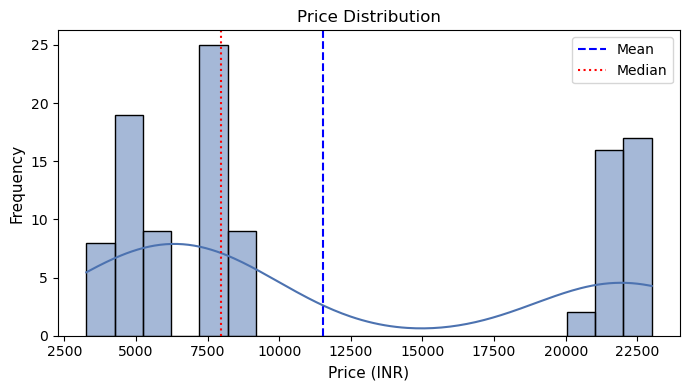

In [32]:
sns.set_palette("deep")
plt.rcParams['axes.labelsize'] = 11

# Price distribution
plt.figure(figsize=(7,4))
sns.histplot(df['price'], bins=20, kde=True)
plt.axvline(df['price'].mean(), color='blue', linestyle='--', label='Mean')
plt.axvline(df['price'].median(), color='red', linestyle=':', label='Median')
plt.title('Price Distribution')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\figures\price_distribution.png")
plt.show()

**Price Distribution Analysis -** Shows the frequency distribution of product prices across the dataset

The price distribution shows two clear segments—an affordable cluster between ₹4,500 and ₹8,500, and a premium cluster around ₹20,000 to ₹23,000. This indicates a market gap in the mid-range price segment, suggesting potential growth opportunities by targeting mid-tier products.

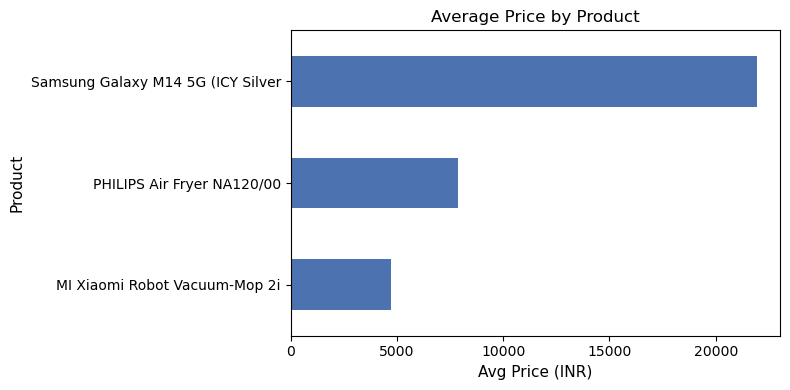

In [33]:
# Product-wise average prices
plt.figure(figsize=(8,4))
df.groupby('product_clean')['price'].mean().sort_values().plot.barh()
plt.title('Average Price by Product')
plt.xlabel('Avg Price (INR)')
plt.ylabel('Product')
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\figures\average_price_by_product.png")
plt.show()

**Average Price by Product –** Shows the mean price for each product, ranked from lowest to highest.

Samsung Galaxy M14 5G (ICY Silver) registers the highest average price, followed by PHILIPS Air Fryer NA120/00; MI Xiaomi Robot Vacuum-Mop 2i is positioned as the most affordable offering. This highlights strong brand pricing for Samsung and a clear price segmentation between large appliances and electronics

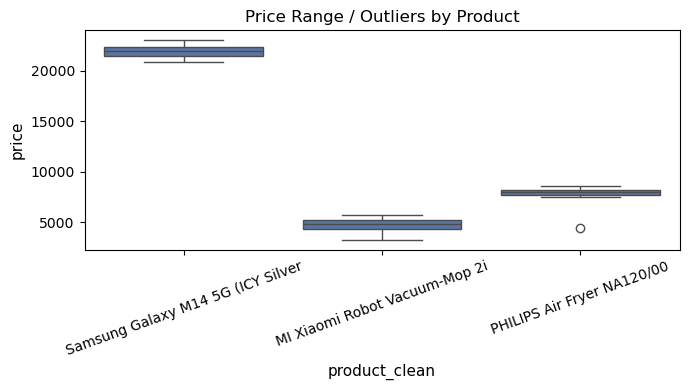

In [34]:
# Boxplot: Price range by product
plt.figure(figsize=(7,4))
sns.boxplot(x='product_clean', y='price', data=df)
plt.title('Price Range / Outliers by Product')
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\figures\price_range_outliers_by_product.png")
plt.show()

**Price Range / Outliers by Product –** Box plots display the distribution and variability of prices for each product.

Samsung Galaxy M14 5G exhibits the broadest price spread with visible outliers, highlighting significant volatility; in contrast, MI Xiaomi Robot Vacuum-Mop 2i and PHILIPS Air Fryer NA120/00 maintain tighter, more predictable pricing ranges.

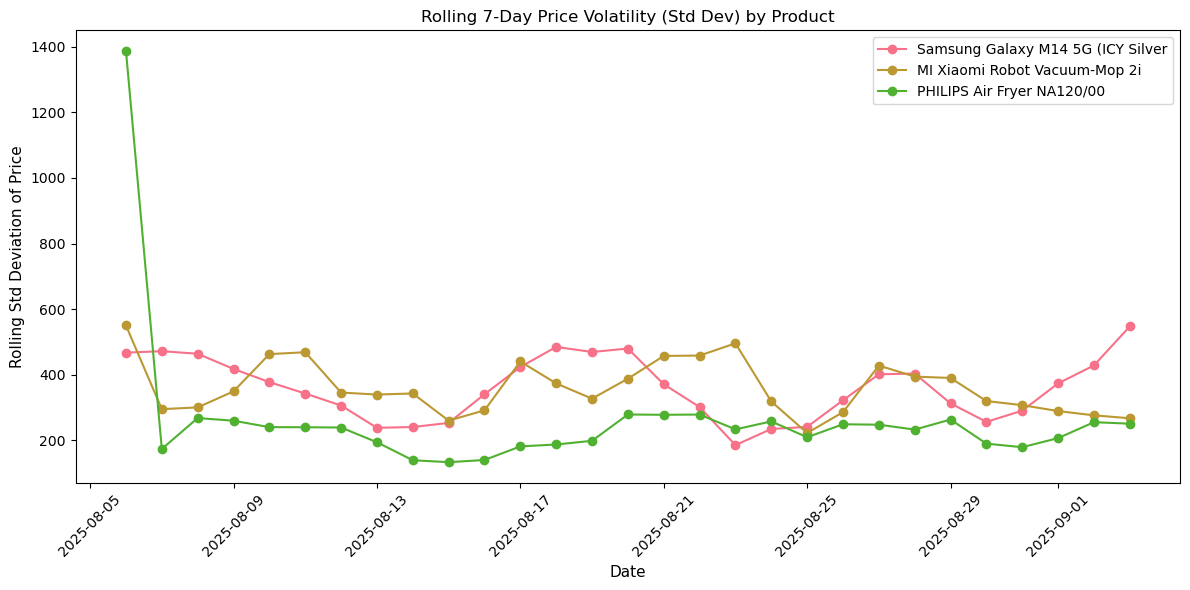

In [35]:
# Rolling plot
# Calculate 7-day rolling std deviation (volatility) and mean
rolling_window = 7
rolling_vol = df.groupby('product_clean').rolling(window=rolling_window, on='date')['price'].std().reset_index(name='rolling_std')
rolling_mean = df.groupby('product_clean').rolling(window=rolling_window, on='date')['price'].mean().reset_index(name='rolling_mean')

# Merge rolling stats
rolling_stats = pd.merge(rolling_vol, rolling_mean, on=['product_clean', 'date'])
df_rolling = pd.merge(df, rolling_stats, on=['product_clean', 'date'], how='left')

# Plot rolling volatility by product
sns.set_palette('husl')
plt.figure(figsize=(12, 6))
for prod in df_rolling['product_clean'].unique():
    data = df_rolling[df_rolling['product_clean'] == prod]
    plt.plot(data['date'], data['rolling_std'], marker='o', label=prod)

plt.title(f'Rolling {rolling_window}-Day Price Volatility (Std Dev) by Product')
plt.xlabel('Date')
plt.ylabel('Rolling Std Deviation of Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\figures\rolling_7day_price_volatility_by_product.png")
plt.show()


**Rolling 7-Day Price Volatility (Std Dev) by Product –** Line chart tracking short-term price fluctuations (rolling standard deviation) for each product over time.
    
Samsung Galaxy M14 5G displays increasing and more frequent volatility spikes toward the end of the period, highlighting greater price instability, while MI Xiaomi Robot Vacuum-Mop 2i and PHILIPS Air Fryer NA120/00 maintain lower and steadier volatility, reflecting more stable market pricing.

In [10]:
# Price Volatility Table (CV %)
# Product-wise volatility (std/mean * 100)

vol_df = df.groupby('product_clean')['price'].agg(['mean', 'std', 'min', 'max'])
vol_df['cv_percent'] = (vol_df['std'] / vol_df['mean'] * 100).round(2)
vol_df['price_range'] = vol_df['max'] - vol_df['min']
print(vol_df[['mean', 'std', 'cv_percent', 'price_range']])


                                           mean         std  cv_percent  \
product_clean                                                             
MI Xiaomi Robot Vacuum-Mop 2i       4724.028571  653.347241       13.83   
PHILIPS Air Fryer NA120/00          7884.200000  679.148377        8.61   
Samsung Galaxy M14 5G (ICY Silver  21928.657143  577.561860        2.63   

                                   price_range  
product_clean                                   
MI Xiaomi Robot Vacuum-Mop 2i           2466.0  
PHILIPS Air Fryer NA120/00              4172.0  
Samsung Galaxy M14 5G (ICY Silver       2134.0  


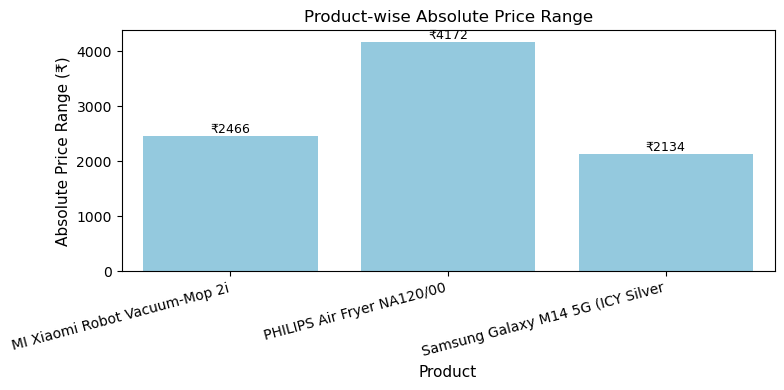

In [36]:
# Range bar
plt.figure(figsize=(8,4))
sns.barplot(x=vol_df.index, y=vol_df['price_range'], color='skyblue')
plt.ylabel('Absolute Price Range (₹)')
plt.xlabel('Product')
plt.title('Product-wise Absolute Price Range')
plt.xticks(rotation=15, ha='right')
for i, v in enumerate(vol_df['price_range']):
    plt.text(i, v+50, f"₹{int(v)}", ha='center', fontsize=9)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\figures\product_wise_absolute_price_range.png")
plt.show()


**Product-wise Absolute Price Range –** Bar chart showing the difference between maximum and minimum price for each product.

PHILIPS Air Fryer NA120/00 shows the highest absolute price fluctuation (₹4,172), highlighting greater pricing instability, whereas Samsung Galaxy M14 5G (₹2,134) and MI Xiaomi Robot Vacuum-Mop 2i (₹2,466) experienced narrower price ranges, indicating relatively more stable pricing.

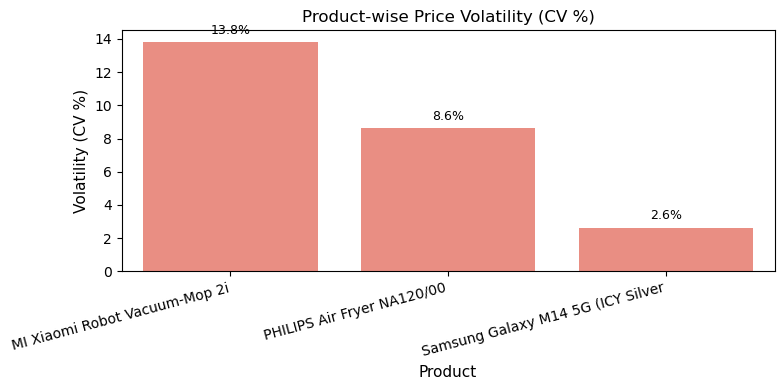

In [37]:
# Volatility Bar Plot
plt.figure(figsize=(8,4))
sns.barplot(x=vol_df.index, y=vol_df['cv_percent'], color='salmon')
plt.ylabel('Volatility (CV %)') 
plt.xlabel('Product')
plt.title('Product-wise Price Volatility (CV %)')
plt.xticks(rotation=15, ha='right')
for i, v in enumerate(vol_df['cv_percent']):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=9)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\figures\product_wise_price_volatility_cv_percent.png")
plt.show()

**Product-wise Price Volatility (CV %) –** Bar chart comparing the relative price instability for each product using coefficient of variation.

MI Xiaomi Robot Vacuum-Mop 2i exhibits the highest price volatility at 13.8%, followed by PHILIPS Air Fryer NA120/00 at 8.6%, while Samsung Galaxy M14 5G (ICY Silver) shows the most stable pricing (2.6%), indicating strong price control or consistent market demand for the Samsung product.

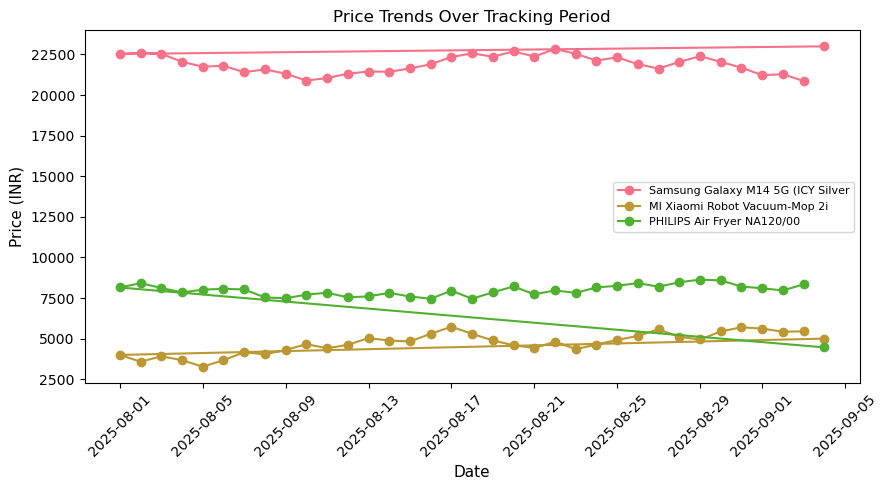

In [38]:
# Time series line plot
plt.figure(figsize=(9,5))
for prod in df['product_clean'].unique():
    temp = df[df['product_clean']==prod]
    plt.plot(temp['date'], temp['price'], marker='o', label=prod)
plt.title('Price Trends Over Tracking Period')
plt.xlabel('Date')
plt.xticks(rotation = 45)
plt.ylabel('Price (INR)')
plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\figures\price_trends_over_tracking_period.png")
plt.show()  

**Price Trends Over Time -** Daily price movements for all tracked products from August to September 2025

Samsung Galaxy M14 shows stable premium pricing with slight fluctuations.
MI Robot Vacuum-Mop 2i displays medium volatility with minor ups and downs.
Philips Air Fryer shows the highest fluctuation with a clear upward trend, indicating strong seasonal demand.

In [17]:
#  Alert table 
# Define threshold for alert - for example, if price change > 5% in a day
df['price_pct_change'] = df.groupby('product_clean')['price'].pct_change() * 100

alerts = df[abs(df['price_pct_change']) > 5]
print(alerts[['product_clean', 'date', 'price', 'price_pct_change']])


                    product_clean       date   price  price_pct_change
37  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-01  3994.0        -20.104021
38  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-02  3577.0        -10.440661
39  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-03  3909.0          9.281521
40  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-04  3673.0         -6.037350
41  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-05  3269.0        -10.999183
42  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-06  3672.0         12.327929
43  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-07  4156.0         13.180828
45  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-09  4300.0          6.673282
46  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-10  4656.0          8.279070
47  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-11  4406.0         -5.369416
49  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-13  5029.0          8.876380
52  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-16  5294.0          9.720207
53  MI Xiaomi Robot Vacuum-Mop 2i 2025-08-17  5735.0          8.330185
54  MI

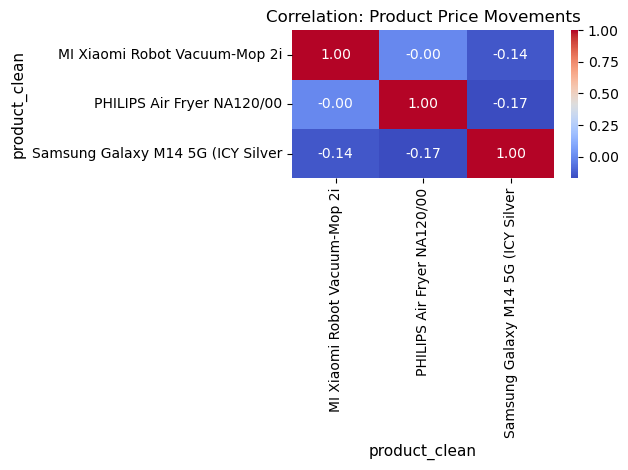

In [39]:
# Pivot for correlation
piv = df.pivot(index='date', columns='product_clean', values='price')
corr = piv.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation: Product Price Movements')
plt.tight_layout()
plt.savefig(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\figures\plot_name.png")
plt.show()

**Price Correlation Matrix -** Shows how different product prices move in relation to each other

Correlations between these products' price movements are weak to slightly negative, indicating that their pricing strategies and market dynamics operate independently. This emphasizes the business need for synchronized, product-specific price tracking rather than relying on cross-product trends

In [40]:
df

,url,title,price,date,source,product_clean,month,week,day,price_pct_change
0,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",23000.0,2025-09-04,scraped,Samsung Galaxy M14 5G (ICY Silver,9,36,4,NaN
1,https://www.amazon.in/Mi-Vacuum-Mop-Powerful-L...,"MI Xiaomi Robot Vacuum-Mop 2i, 2200 Pa Powerfu...",4999.0,2025-09-04,scraped,MI Xiaomi Robot Vacuum-Mop 2i,9,36,4,NaN
2,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",4459.0,2025-09-04,scraped,PHILIPS Air Fryer NA120/00,9,36,4,NaN
3,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",22530.0,2025-08-01,dummy,Samsung Galaxy M14 5G (ICY Silver,8,31,1,-2.043478
4,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",22614.0,2025-08-02,dummy,Samsung Galaxy M14 5G (ICY Silver,8,31,2,0.372836
...,...,...,...,...,...,...,...,...,...,...
100,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8585.0,2025-08-30,dummy,PHILIPS Air Fryer NA120/00,8,35,30,-0.532963
101,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8205.0,2025-08-31,dummy,PHILIPS Air Fryer NA120/00,8,35,31,-4.426325
102,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8100.0,2025-09-01,dummy,PHILIPS Air Fryer NA120/00,9,36,1,-1.279707
103,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",7965.0,2025-09-02,dummy,PHILIPS Air Fryer NA120/00,9,36,2,-1.666667


In [41]:
df_rolling

,url,title,price,date,source,product_clean,month,week,day,price_pct_change,rolling_std,rolling_mean
0,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",23000.0,2025-09-04,scraped,Samsung Galaxy M14 5G (ICY Silver,9,36,4,NaN,NaN,NaN
1,https://www.amazon.in/Mi-Vacuum-Mop-Powerful-L...,"MI Xiaomi Robot Vacuum-Mop 2i, 2200 Pa Powerfu...",4999.0,2025-09-04,scraped,MI Xiaomi Robot Vacuum-Mop 2i,9,36,4,NaN,NaN,NaN
2,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",4459.0,2025-09-04,scraped,PHILIPS Air Fryer NA120/00,9,36,4,NaN,NaN,NaN
3,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",22530.0,2025-08-01,dummy,Samsung Galaxy M14 5G (ICY Silver,8,31,1,-2.043478,NaN,NaN
4,https://www.amazon.in/Samsung-Galaxy-Silver-12...,"Samsung Galaxy M14 5G (ICY Silver,6GB,128GB St...",22614.0,2025-08-02,dummy,Samsung Galaxy M14 5G (ICY Silver,8,31,2,0.372836,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
100,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8585.0,2025-08-30,dummy,PHILIPS Air Fryer NA120/00,8,35,30,-0.532963,190.074296,8386.714286
101,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8205.0,2025-08-31,dummy,PHILIPS Air Fryer NA120/00,8,35,31,-4.426325,179.273268,8394.714286
102,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",8100.0,2025-09-01,dummy,PHILIPS Air Fryer NA120/00,9,36,1,-1.279707,206.950765,8372.428571
103,https://www.amazon.in/PHILIPS-Fryer-NA120-00-T...,"PHILIPS Air Fryer NA120/00, uses up to 90% les...",7965.0,2025-09-02,dummy,PHILIPS Air Fryer NA120/00,9,36,2,-1.666667,255.537622,8307.857143


In [47]:
df_dashboard = df_rolling[['product_clean', 'date', 'price', 'rolling_std', 'price_pct_change']]
# Add alert flag (example: price change > 5%)
df_dashboard['alert'] = df_dashboard['price_pct_change'].abs() > 5

# Fill NaNs if useful, convert date formatting
df_dashboard['date'] = pd.to_datetime(df_dashboard['date']).dt.strftime('%Y-%m-%d')
df_dashboard.fillna('', inplace=True)  # Optional: Replace NaNs with blank

In [48]:
df_dashboard

,product_clean,date,price,rolling_std,price_pct_change,alert
0,Samsung Galaxy M14 5G (ICY Silver,2025-09-04,23000.0,,,False
1,MI Xiaomi Robot Vacuum-Mop 2i,2025-09-04,4999.0,,,False
2,PHILIPS Air Fryer NA120/00,2025-09-04,4459.0,,,False
3,Samsung Galaxy M14 5G (ICY Silver,2025-08-01,22530.0,,-2.043478,False
4,Samsung Galaxy M14 5G (ICY Silver,2025-08-02,22614.0,,0.372836,False
...,...,...,...,...,...,...
100,PHILIPS Air Fryer NA120/00,2025-08-30,8585.0,190.074296,-0.532963,False
101,PHILIPS Air Fryer NA120/00,2025-08-31,8205.0,179.273268,-4.426325,False
102,PHILIPS Air Fryer NA120/00,2025-09-01,8100.0,206.950765,-1.279707,False
103,PHILIPS Air Fryer NA120/00,2025-09-02,7965.0,255.537622,-1.666667,False


In [49]:
df_dashboard.to_csv(r"C:\Users\HP\Documents\ecommerce_price_analytics\outputs\dashboard_data.csv", index=False)


### Final Alert Script with Email

In [58]:
import pandas as pd
import smtplib
from email.mime.text import MIMEText
import yaml

# Load config
with open(r"C:\Users\HP\Documents\ecommerce_price_analytics\config\config.yaml", 'r') as f:
    config = yaml.safe_load(f)

# Config variables
email_config = config['email']
alert_config = config['alerts']
paths_config = config['paths']

# Load preprocessed data
df = pd.read_csv(paths_config['dashboard_output'])

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Alert threshold from config
alert_threshold = alert_config['price_drop_threshold']

# Latest drop date where price dropped more than threshold
last_drop_date = df[(df['price_pct_change'] < -alert_threshold)]['date'].max()

# Filter alerts
latest_alerts = df[
    (df['date'] == last_drop_date) &
    (df['alert'] == True) &
    (df['price_pct_change'] < -alert_threshold)
]

if latest_alerts.empty:
    print("No significant price drop alerts found for latest date. No email sent.")
else:
    print(f"Alerts found: {len(latest_alerts)}")
    alert_lines = []
    for _, row in latest_alerts.iterrows():
        line = (f"Product: {row['product_clean']}\n"
                f"Date: {row['date'].strftime('%Y-%m-%d')}\n"
                f"Price: ₹{row['price']:.2f}\n"
                f"Price Drop: {row['price_pct_change']:.2f}%\n"
                f"Volatility (7-day std dev): {row['rolling_std']:.2f}\n")
        alert_lines.append(line)
    message_body = "\n\n".join(alert_lines)

    # Email sending function
    def send_email(subject, body, to_email):
        from_email = email_config['sender']
        password = email_config['app_password']
        msg = MIMEText(body)
        msg['Subject'] = subject
        msg['From'] = from_email
        msg['To'] = to_email
        try:
            server = smtplib.SMTP('smtp.gmail.com', 587)
            server.starttls()
            server.login(from_email, password)
            server.send_message(msg)
            server.quit()
            print("Alert email sent successfully.")
        except Exception as e:
            print("Failed to send email:", e)

    recipient_email = email_config['recipient']
    subject = f"URGENT: Price Drop Alert on Ecommerce Products - {last_drop_date.strftime('%Y-%m-%d')}"
    send_email(subject, message_body, recipient_email)


Alerts found: 1
Alert email sent successfully.
